In my questions, I aim to explore the relationship between the number of close/casual friends an individual has and the emotional/social well-being associated. Does having more friends or a larger social network necessarily mean that you will be happier, or is it the opposite? Is there a certain threshold for a certain amount of friends, where any point after that leads to a decline in social well-being/ life satisfaction? what role do friends play in one's mental well-being?

here are 3 questions that i prepared which relates to this topic.

Question 1: how does the amount of close friends affect an individual's confidence that other people will be there for them?

variables used: 
1. 	CONNECTION_social_num_close_friends_grouped ('How many close friends do you have?')
2. PSYCH_attachment_style_questionnaire_secure_confident ('Please respond to the following items using the scale provided - I feel confident that other people will be there for me when I need them')

funny enough, there is a decline in confidence after any further increases in number of close friends after 4

/tmp/ipykernel_85/1592863846.py:8: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)
/tmp/ipykernel_85/1592863846.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='close_friends_num', y='mean', data=grouped_stats, errorbar='sd', palette='viridis', ci=None)
/tmp/ipykernel_85/1592863846.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='close_friends_num', y='mean', data=grouped_stats, errorbar='sd', palette='viridis', ci=None)


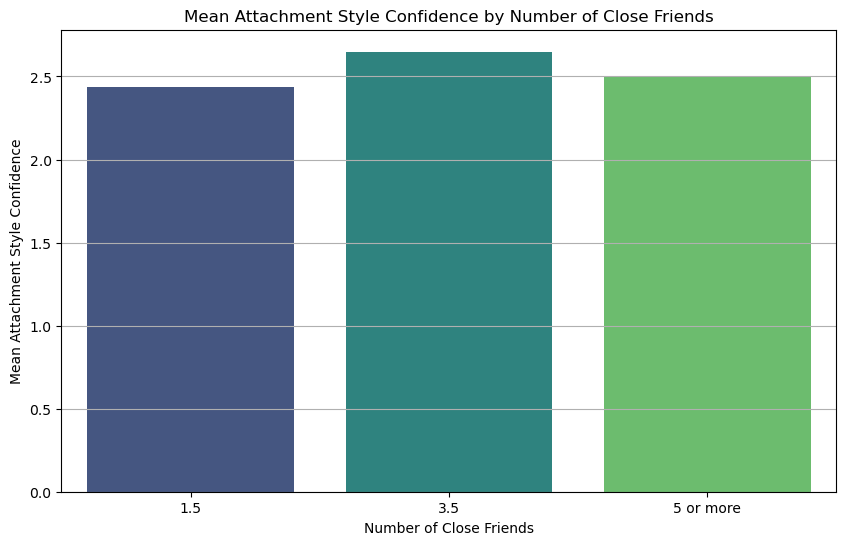

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://github.com/pointOfive/stat130chat130/blob/main/CP/CSCS_data_anon.csv?raw=true'
data = pd.read_csv(url)

# Function to convert close friends string values to numeric
def convert_close_friends(value):
    if pd.isna(value):
        return np.nan
    if 'or more' in value:
        return 5  # Assuming '5 or more' translates to 5
    elif 'Presented but no response' in value:
        return np.nan  # Treating as missing
    else:
        parts = value.split('–')
        return np.mean([int(parts[0]), int(parts[1])]) if len(parts) > 1 else int(parts[0])

# Apply the conversion function to the relevant column
data['close_friends_num'] = data['CONNECTION_social_num_close_friends_grouped'].apply(convert_close_friends)

# Mapping for attachment style questionnaire
attachment_style_map = {
    'Totally agree': 5,
    'Somewhat agree': 4,
    'Somewhat disagree': 2,
    'Totally disagree': 0,
    'Disagree': 1
}

# Convert the attachment style responses to numeric values
data['attachment_style_num'] = data['PSYCH_attachment_style_questionnaire_secure_confident'].map(attachment_style_map)

# Group by number of close friends and calculate mean and standard deviation of attachment style scores
grouped_stats = data.groupby('close_friends_num')['attachment_style_num'].agg(['mean', 'std']).reset_index()

# Replace numeric labels with string labels in the grouped stats
grouped_stats['close_friends_num'] = grouped_stats['close_friends_num'].replace({5: '5 or more'})

# Visualization of the mean attachment style confidence
plt.figure(figsize=(10, 6))
sns.barplot(x='close_friends_num', y='mean', data=grouped_stats, errorbar='sd', palette='viridis', ci=None)
plt.title('Mean Attachment Style Confidence by Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Mean Attachment Style Confidence')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()


Question 2: Do individuals who frequently rely on friends for emotional support (when things go wrong) experience lower levels of emptiness compared to those who do not?

objective: does having someone to rely on make you feel less empty

variables used:
1. frequency of emotional support from friends ('I can count on my friends when things go wrong') PSYCH_zimet_multidimensional_social_support_scale_go_wrong 

2. emptiness score ('I experience a general sense of emptiness')
LONELY_dejong_emotional_social_loneliness_scale_emptiness

/tmp/ipykernel_117/1474030657.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_loneliness = data.groupby('support_binned')['loneliness_num'].agg(['mean', 'std']).reset_index()
/tmp/ipykernel_117/1474030657.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support_binned', y='mean', data=grouped_loneliness, errorbar='sd', palette='viridis')


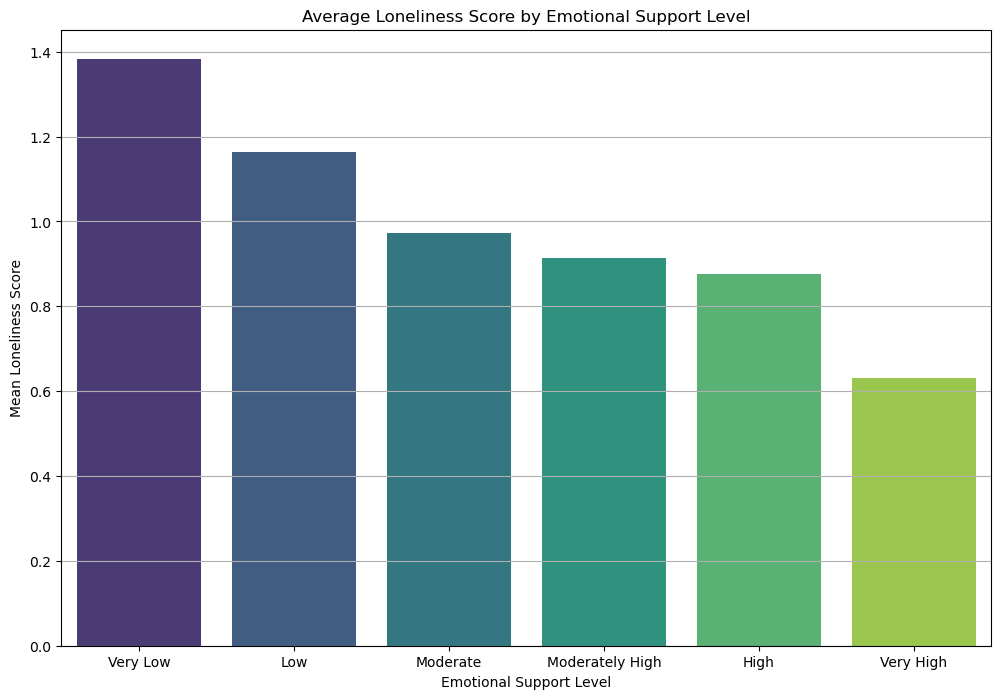

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://github.com/pointOfive/stat130chat130/blob/main/CP/CSCS_data_anon.csv?raw=true'
data = pd.read_csv(url, low_memory=False)

# Mapping for emotional support scale
support_map = {
    'Very Strongly Agree': 5,
    'Strongly Agree': 4,
    'Agree': 3,
    'Neither Agree Nor Disagree': 2,
    'Disagree': 1,
    'Strongly Disagree': 0,
    'Very Strongly Disagree': -1
}

# Map the emotional support responses to numeric values
data['social_support_num'] = data['PSYCH_zimet_multidimensional_social_support_scale_go_wrong'].map(support_map)

# Mapping for loneliness scale
loneliness_map = {
    'No': 0,
    'More or less': 1,
    'Yes': 2
}

# Map the loneliness responses to numeric values
data['loneliness_num'] = data['LONELY_dejong_emotional_social_loneliness_scale_emptiness'].map(loneliness_map)

# Drop rows where either 'social_support_num' or 'loneliness_num' is missing
data = data.dropna(subset=['social_support_num', 'loneliness_num'])

# Define bins for social support scores to create smaller groups
bins = [-1, 0, 1, 2, 3, 4, 5]
labels = ['Very Low', 'Low', 'Moderate', 'Moderately High', 'High', 'Very High']

# Create a binned category for social support
data['support_binned'] = pd.cut(data['social_support_num'], bins=bins, labels=labels, include_lowest=True)

# Group by the binned support levels and calculate the mean and standard deviation of loneliness
grouped_loneliness = data.groupby('support_binned')['loneliness_num'].agg(['mean', 'std']).reset_index()

# Plot the bar plot with error bars representing the standard deviation
plt.figure(figsize=(12, 8))
sns.barplot(x='support_binned', y='mean', data=grouped_loneliness, errorbar='sd', palette='viridis')
plt.title('Average Loneliness Score by Emotional Support Level')
plt.xlabel('Emotional Support Level')
plt.ylabel('Mean Loneliness Score')
plt.grid(axis='y')

# Show the plot
plt.show()


Question 3: What is the relationship between having a special person with whom an individual can share their joys & sorrows and their satisfaction with the number of friends they have? 

(do people tend to be satisfied with their amount of friends if they have a someone to share their joys & sorrows with)

variables used: 
1. PSYCH_zimet_multidimensional_social_support_scale_joys - 'There is a special person with whom I can share my joys and sorrows' 
2. CONNECTION_satisfied_num_friends - 'Are you satisfied with the number of friends you have now?' (either Yes or No)

/tmp/ipykernel_53/655332304.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)
/tmp/ipykernel_53/655332304.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_filtered[data_filtered['friend_satisfaction'] == 1], x='joys_support', label='Satisfied with Friends', shade=True)
/tmp/ipykernel_53/655332304.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_filtered[data_filtered['friend_satisfaction'] == 0], x='joys_support', label='Wants

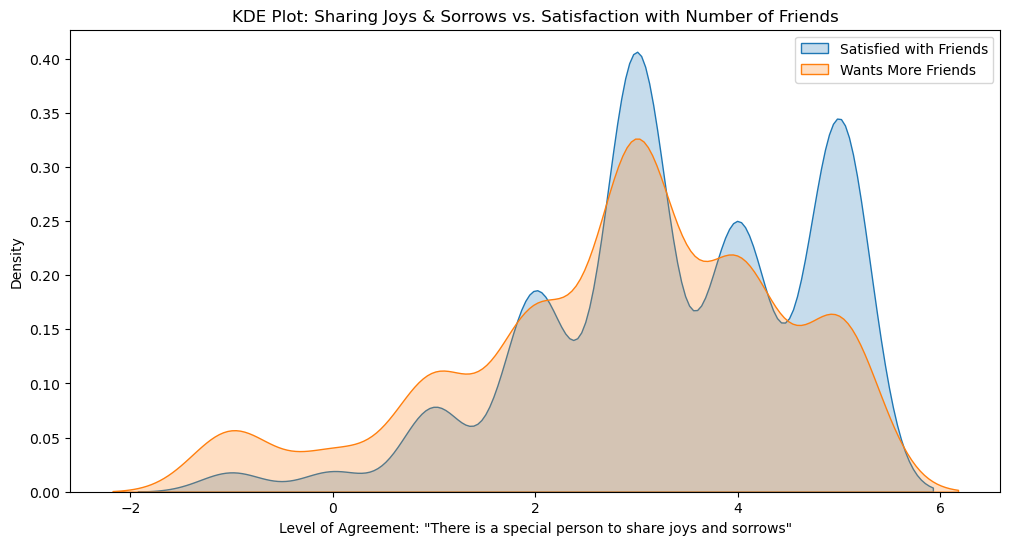

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/pointOfive/stat130chat130/raw/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(url)

# Filter and clean the data
data_filtered = data[['PSYCH_zimet_multidimensional_social_support_scale_joys', 'CONNECTION_satisfied_num_friends']].dropna()

# Mapping the survey answers to numerical values for joys_support
support_map = {
    'Very Strongly Agree': 5,
    'Strongly Agree': 4,
    'Agree': 3,
    'Neither Agree Nor Disagree': 2,
    'Disagree': 1,
    'Strongly Disagree': 0,
    'Very Strongly Disagree': -1
}
satisfaction_map = {
    'Yes': 1,
    'No, I want to have MORE friends.': 0
}

# Apply the mappings
data_filtered['joys_support'] = data_filtered['PSYCH_zimet_multidimensional_social_support_scale_joys'].map(support_map)
data_filtered['friend_satisfaction'] = data_filtered['CONNECTION_satisfied_num_friends'].map(satisfaction_map)

# Plot the KDEs
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_filtered[data_filtered['friend_satisfaction'] == 1], x='joys_support', label='Satisfied with Friends', shade=True)
sns.kdeplot(data=data_filtered[data_filtered['friend_satisfaction'] == 0], x='joys_support', label='Wants More Friends', shade=True)

plt.title('KDE Plot: Sharing Joys & Sorrows vs. Satisfaction with Number of Friends')
plt.xlabel('Level of Agreement: "There is a special person to share joys and sorrows"')
plt.ylabel('Density')
plt.legend()
plt.show()
